In [1]:
%load_ext autoreload
%autoreload 2
import os

import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import skill_metrics
from sklearn.metrics import r2_score, mean_squared_error
    

In [2]:
from nnfluxes.datasets.loaders import load_dataset, BootstrapLoader
from nnfluxes.analysis.postprocessing import merge_data, prepare_data
from nnfluxes.analysis.visualization import monthly_curves, plot_training_curves, taylor_plot

# Monthly fluxes plots

In [3]:
results_path = Path.cwd().parent.joinpath('results', 'results_Nightconstrained_random_DE-Tha_2006_Tramontana')
#load dataframes at float32 precision

GPP = pd.read_csv(results_path.joinpath('GPP.csv'), index_col=0)
RECO = pd.read_csv(results_path.joinpath('RECO.csv'), index_col=0)
NEE = pd.read_csv(results_path.joinpath('NEE.csv'), index_col=0)

GPP, RECO, NEE = merge_data(GPP, RECO, NEE, site_name='DE-Tha', year=2013)
GPP, RECO, NEE = prepare_data(GPP, RECO, NEE, ensemble_size=100)


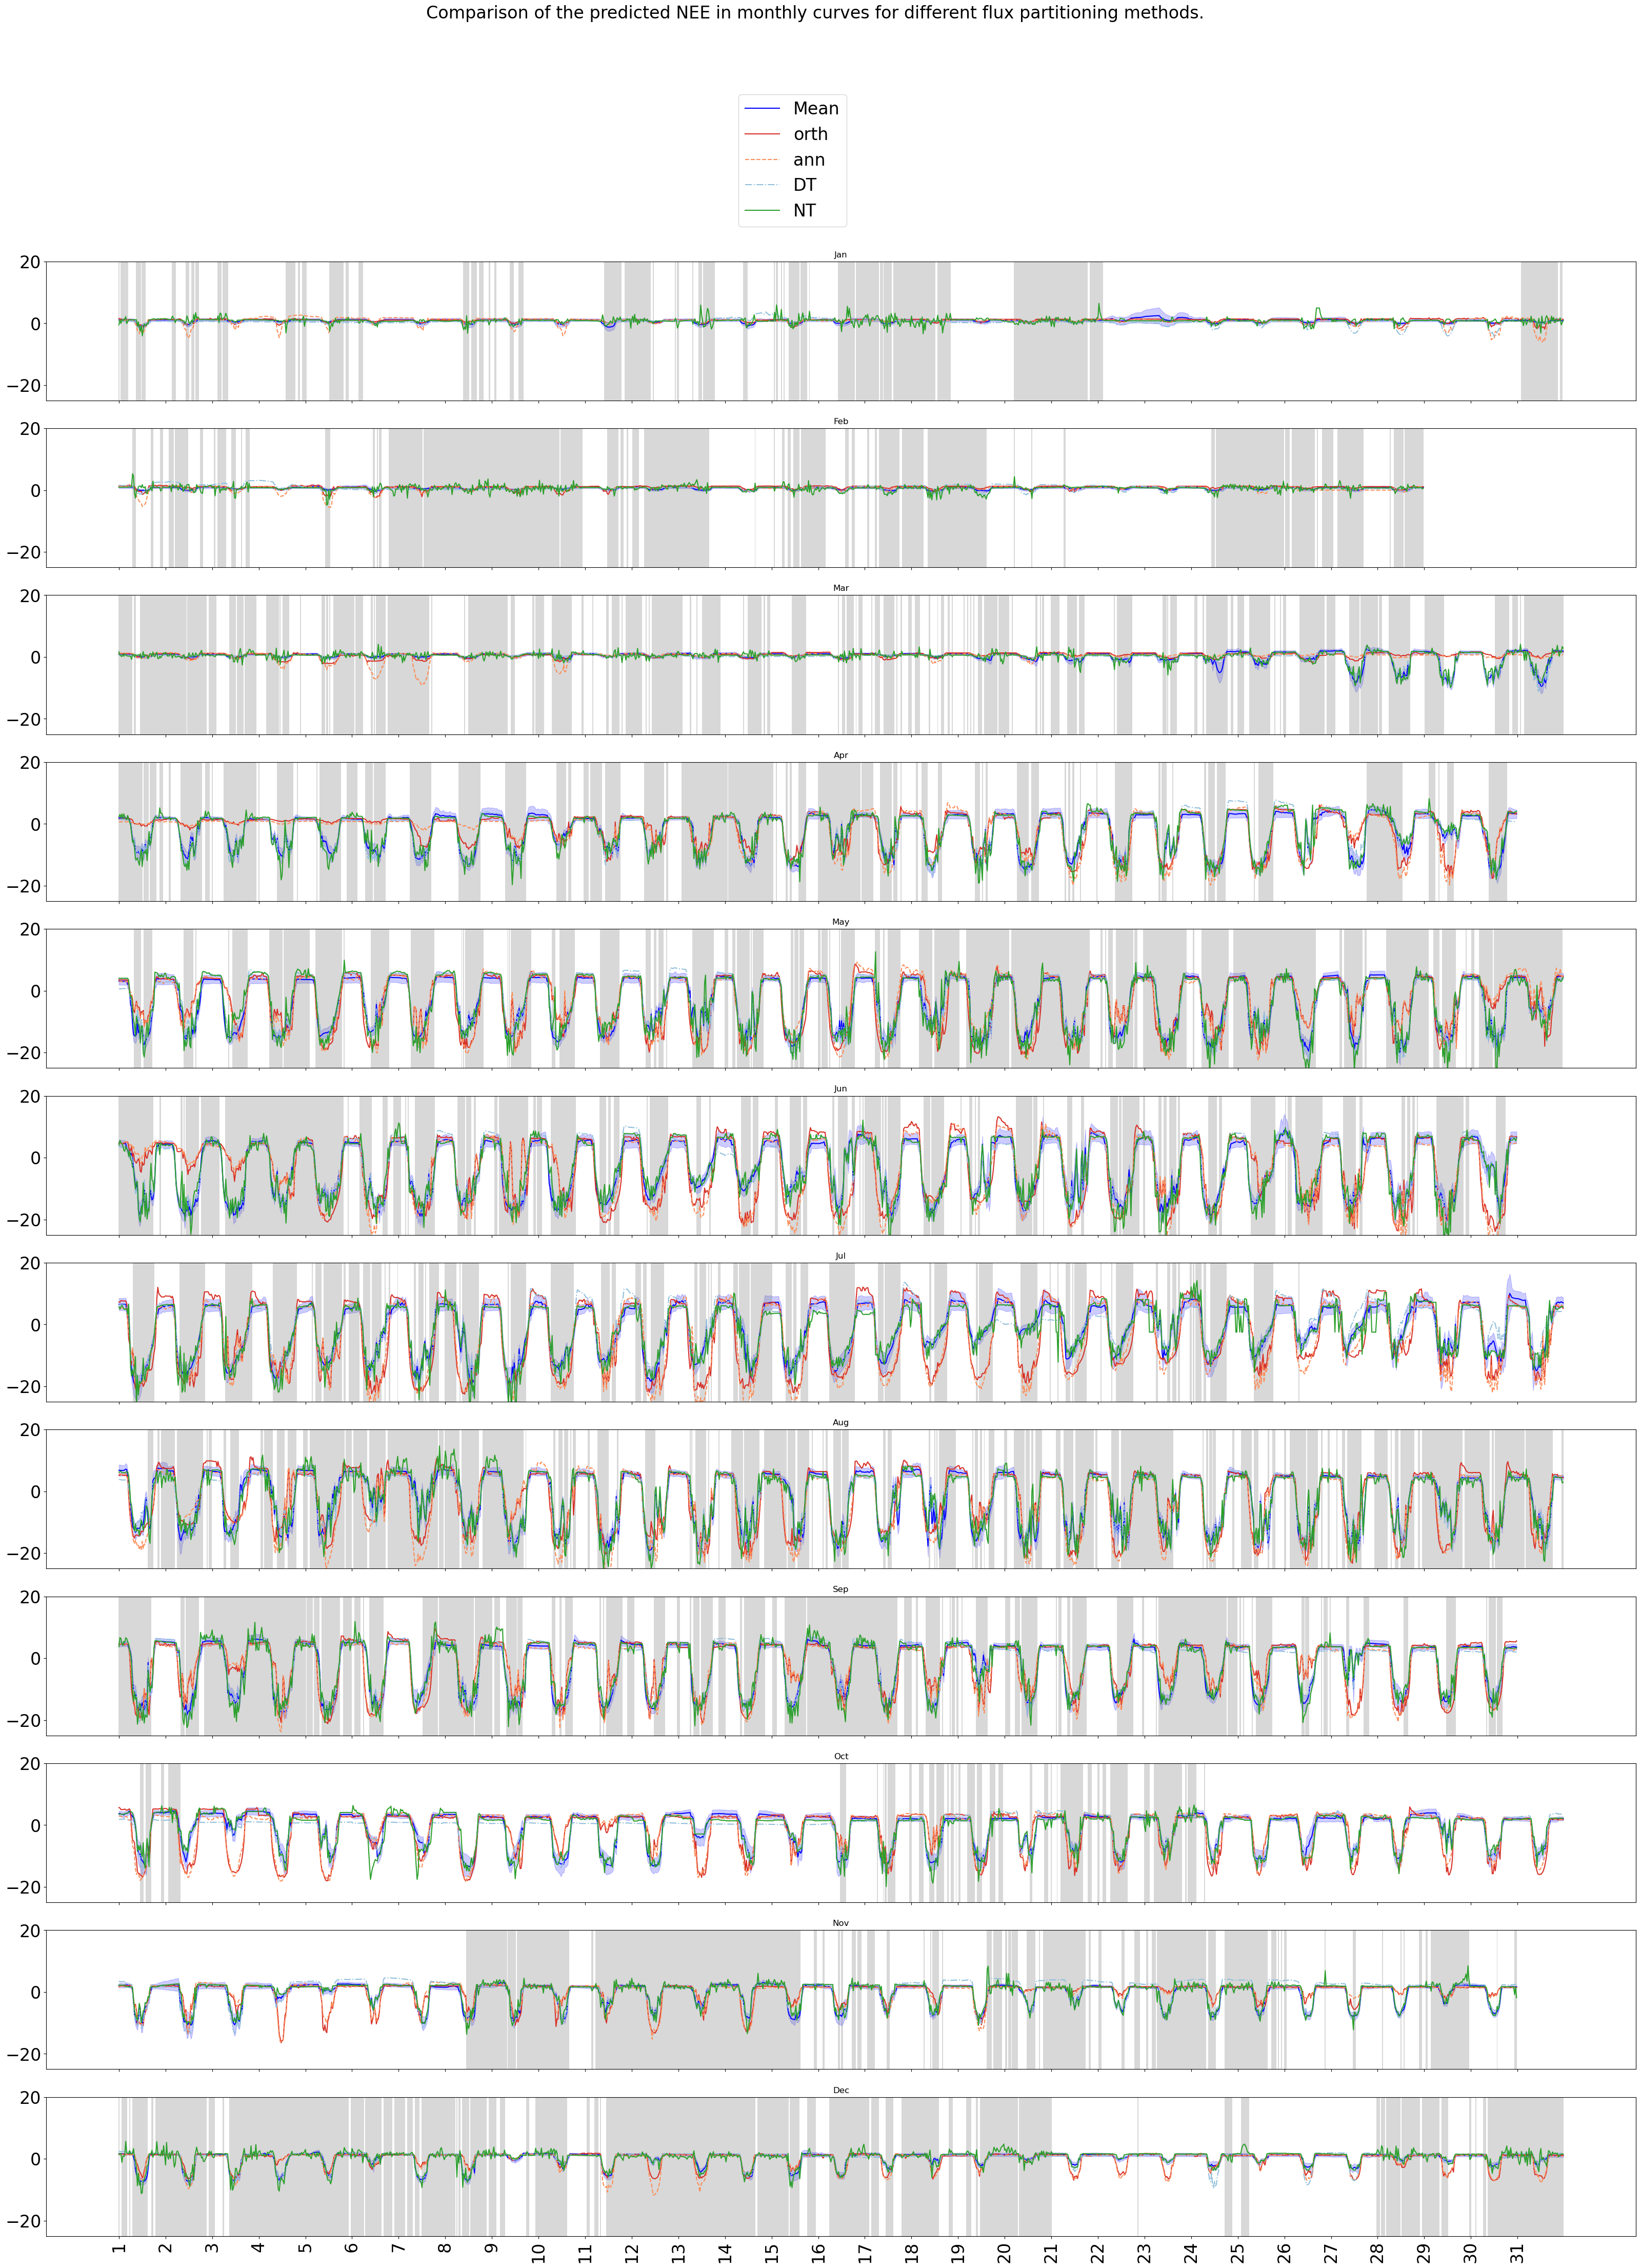

In [4]:
monthly_curves('NEE', NEE, results_path=results_path)
#monthly_curves('GPP', GPP, results_path=results_path)
#monthly_curves('RECO', RECO, results_path=results_path)

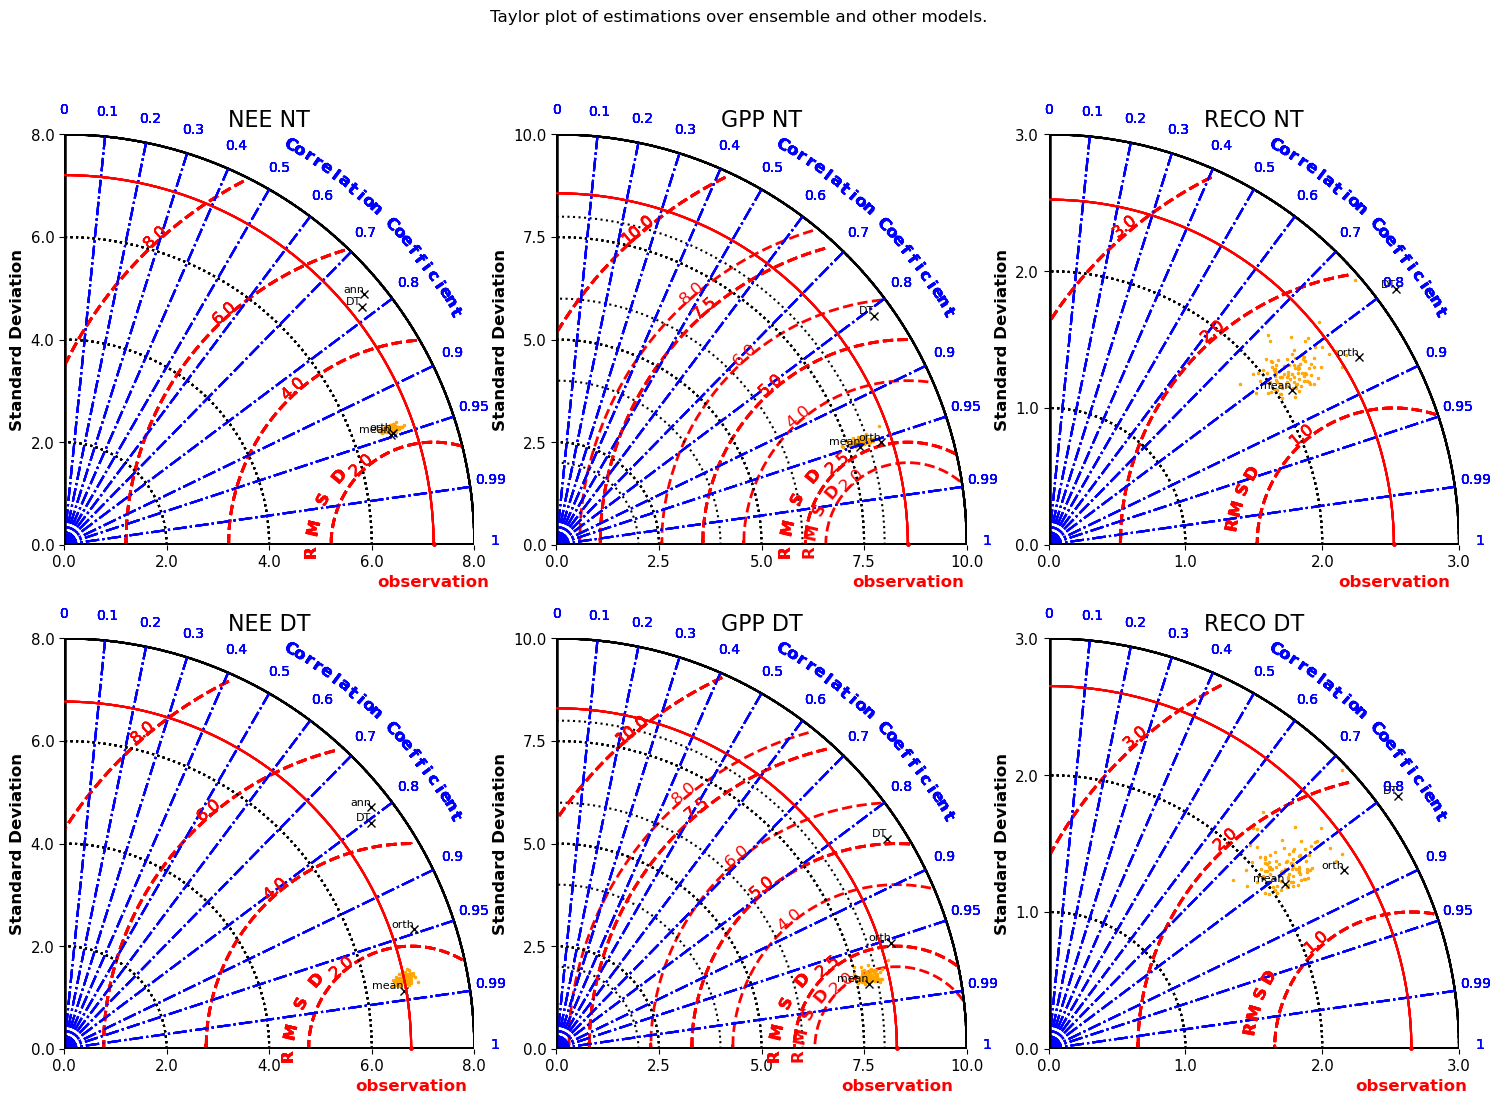

In [10]:
taylor_plot(NEE, GPP, RECO, ensemble_size=100, filtered=True)

# Training curves

In [ ]:
train_log = pd.read_csv(results_path.joinpath('train_log.csv'), index_col=0)
val_log = pd.read_csv(results_path.joinpath('val_log.csv'), index_col=0)
test_log = pd.read_csv(results_path.joinpath('test_log.csv'), index_col=0)

In [ ]:
plot_training_curves(train_log, val_log, test_log, results_path, moving_window_size=20, format='aggregated')

In [ ]:
data_config = {'hybrid_model': 'BaseModel',
                    'nn_1': ['VPD','SW_IN', 'doy_cos', 'doy_sin'], #'PA', 'RH', 'WS', 'P', 'tod_sin', 'tod_cos'
                    'nn_2': ['VPD','TA', 'doy_cos', 'doy_sin'], #'PA', 'RH', 'WS', 'P', 'tod_sin', 'tod_cos'
                    'split': 'random',
                    'site': 'DE-Tha',
                    'year': 2013,
                    'filter': 'Tramontana',
                    'target': 'NEE',
    }
    
################ Load the data  ################
#ToDO: Define one loading function for training and one for inference
#train, val, test, out, all = load_dataset(data_config, training=True)
all = load_dataset(data_config, training=True)

In [ ]:
all = load_dataset(data_config, training=False)